In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


df = pd.read_csv('MergedForWeka.csv')

# Encode the 'App Category' column
le = LabelEncoder()
df['App Category'] = le.fit_transform(df['App Category'])

# Use all columns except 'App Category' as features
X = df.drop(columns=['App Category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['App Category'], test_size=0.1, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Example 
new_data = pd.DataFrame({
    'Usage (hours)': [200],
    'Access count': [5000],
    'average_time_per_access (Minutes)': [3.5],
    'average_time_per_day (Minutes)': [120]
})
predicted_category = le.inverse_transform(model.predict(new_data))
print(f"Predicted category for new data: {predicted_category[0]}")


C:\Users\a2004\AppData\Local\Temp\ipykernel_22056\3873801088.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


FileNotFoundError: [Errno 2] No such file or directory: 'MergedForWeka.csv'

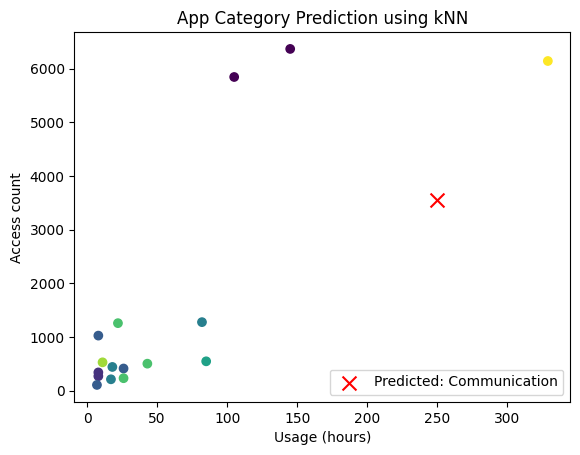

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('MergedForWeka.csv')

# Encode the 'App Category' column
le = LabelEncoder()
df['App Category'] = le.fit_transform(df['App Category'])

# Split data into features (X) and target (y)
X = df.drop(columns=['App Category'])
y = df['App Category']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train the kNN model (you can adjust the number of neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Example 
new_data = pd.DataFrame({
    'Usage (hours)': [250],
    'Access count': [3560],
    'average_time_per_access (Minutes)': [3.5],
    'average_time_per_day (Minutes)': [50]
})
predicted_category = le.inverse_transform(knn.predict(new_data))

# Plot the data points and the predicted category
plt.scatter(X['Usage (hours)'], X['Access count'], c=y, cmap='viridis')
plt.scatter(new_data['Usage (hours)'], new_data['Access count'], c='red', marker='x', s=100, label=f"Predicted: {predicted_category[0]}")
plt.xlabel('Usage (hours)')
plt.ylabel('Access count')
plt.title("App Category Prediction using kNN")
plt.legend()
plt.show()
